In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import warnings
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from numpy import split, array
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, RepeatVector, TimeDistributed, ConvLSTM2D
from sklearn.model_selection import GridSearchCV


In [26]:
import pandas as pd

# Load the dataset
path = '/content/drive/MyDrive/Data_Science/01_Projects/04_Pakistan_Energy_Demand/Data/pak_load_till_2023_output.csv'
dataset = pd.read_csv(path)

# Convert the 'datetime' columns to a single datetime column
dataset['datetime'] = pd.to_datetime(dataset[['YEAR', 'MONTH', 'DAY', 'Hour']])
dataset['Date'] = pd.to_datetime(dataset[['YEAR', 'MONTH', 'DAY']])

# Set 'datetime' as the index
dataset.set_index('datetime', inplace=True)

# Drop unnecessary columns
dataset.drop(['YEAR', 'MONTH', 'DAY', 'Hour'], axis=1, inplace=True)

# Extract additional date-related features
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month
dataset['dayofweek'] = dataset.index.dayofweek
dataset['hour'] = dataset.index.hour

# Display the first row of the modified dataset
print(dataset.head(10))


                         Demand       Date  year  month  dayofweek  hour
datetime                                                                
2019-07-01 01:00:00  19615.2656 2019-07-01  2019      7          0     1
2019-07-01 02:00:00  17842.2494 2019-07-01  2019      7          0     2
2019-07-01 03:00:00  17663.2494 2019-07-01  2019      7          0     3
2019-07-01 04:00:00  18715.0406 2019-07-01  2019      7          0     4
2019-07-01 05:00:00  18839.8286 2019-07-01  2019      7          0     5
2019-07-01 06:00:00  18170.1786 2019-07-01  2019      7          0     6
2019-07-01 07:00:00  17795.2036 2019-07-01  2019      7          0     7
2019-07-01 08:00:00  18957.4286 2019-07-01  2019      7          0     8
2019-07-01 09:00:00  19725.1536 2019-07-01  2019      7          0     9
2019-07-01 10:00:00  19885.4036 2019-07-01  2019      7          0    10


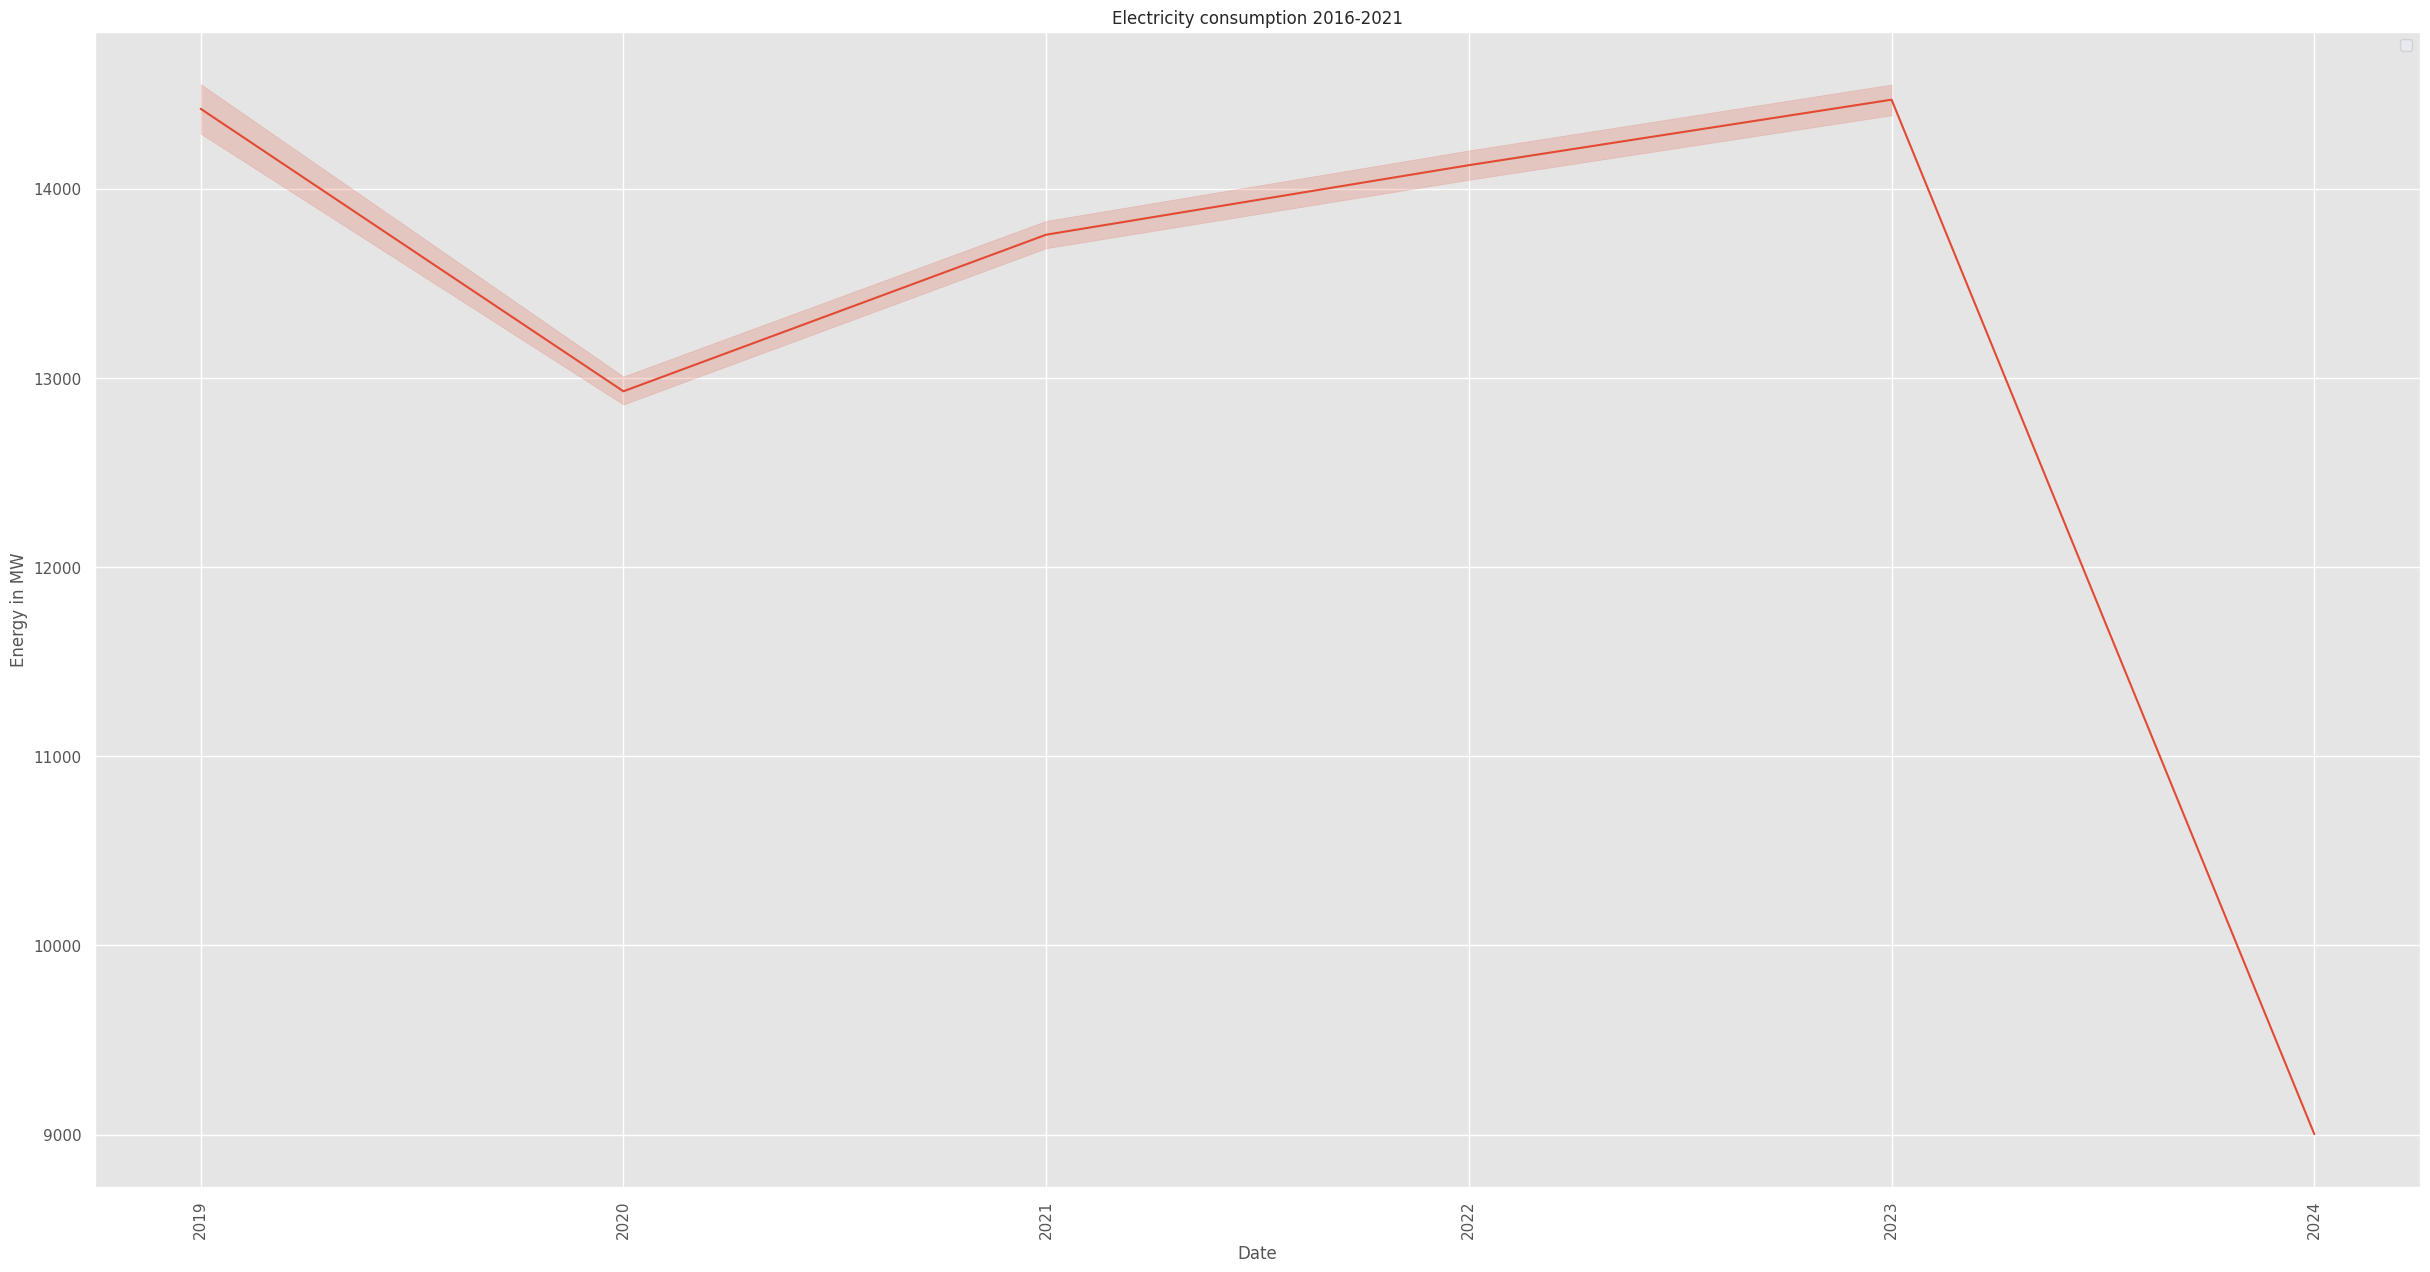

In [27]:
from matplotlib import style
import seaborn as sns
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["year"], y= dataset["Demand"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


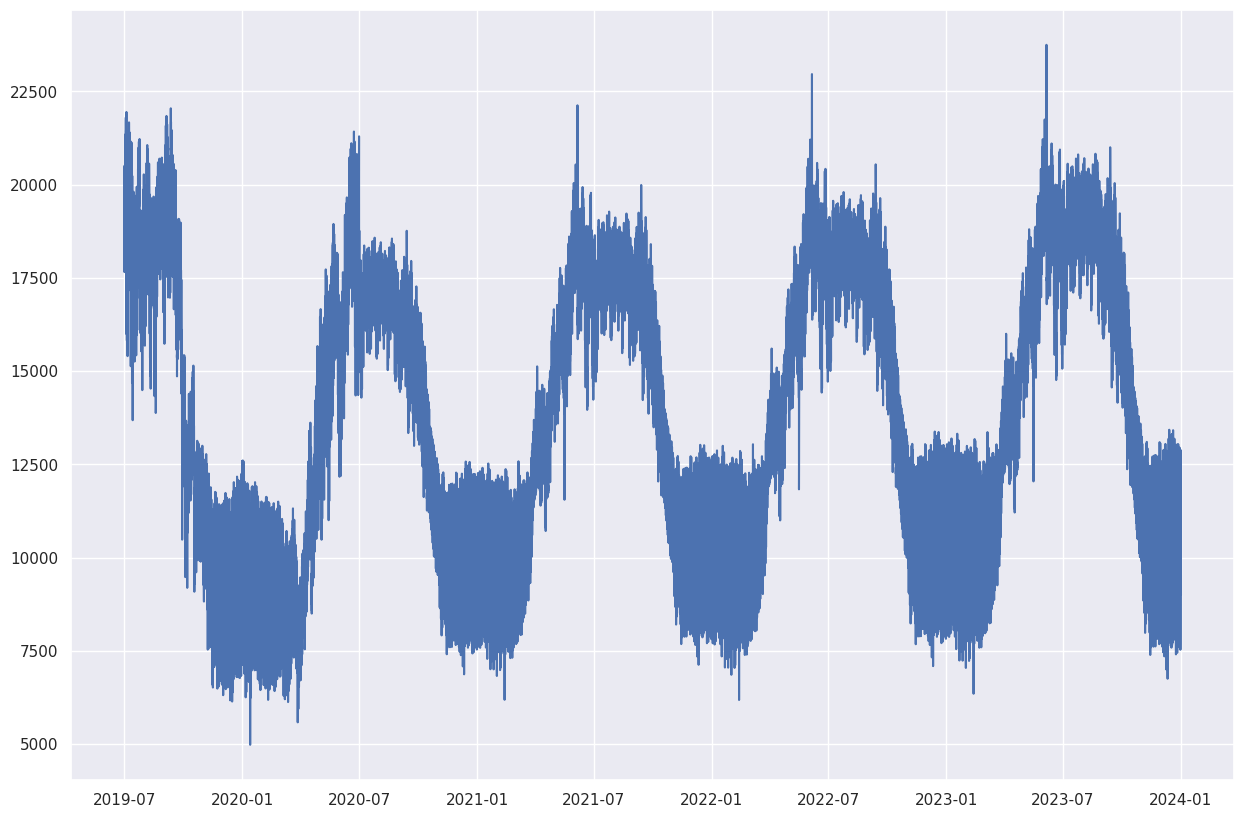

In [28]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Demand"])

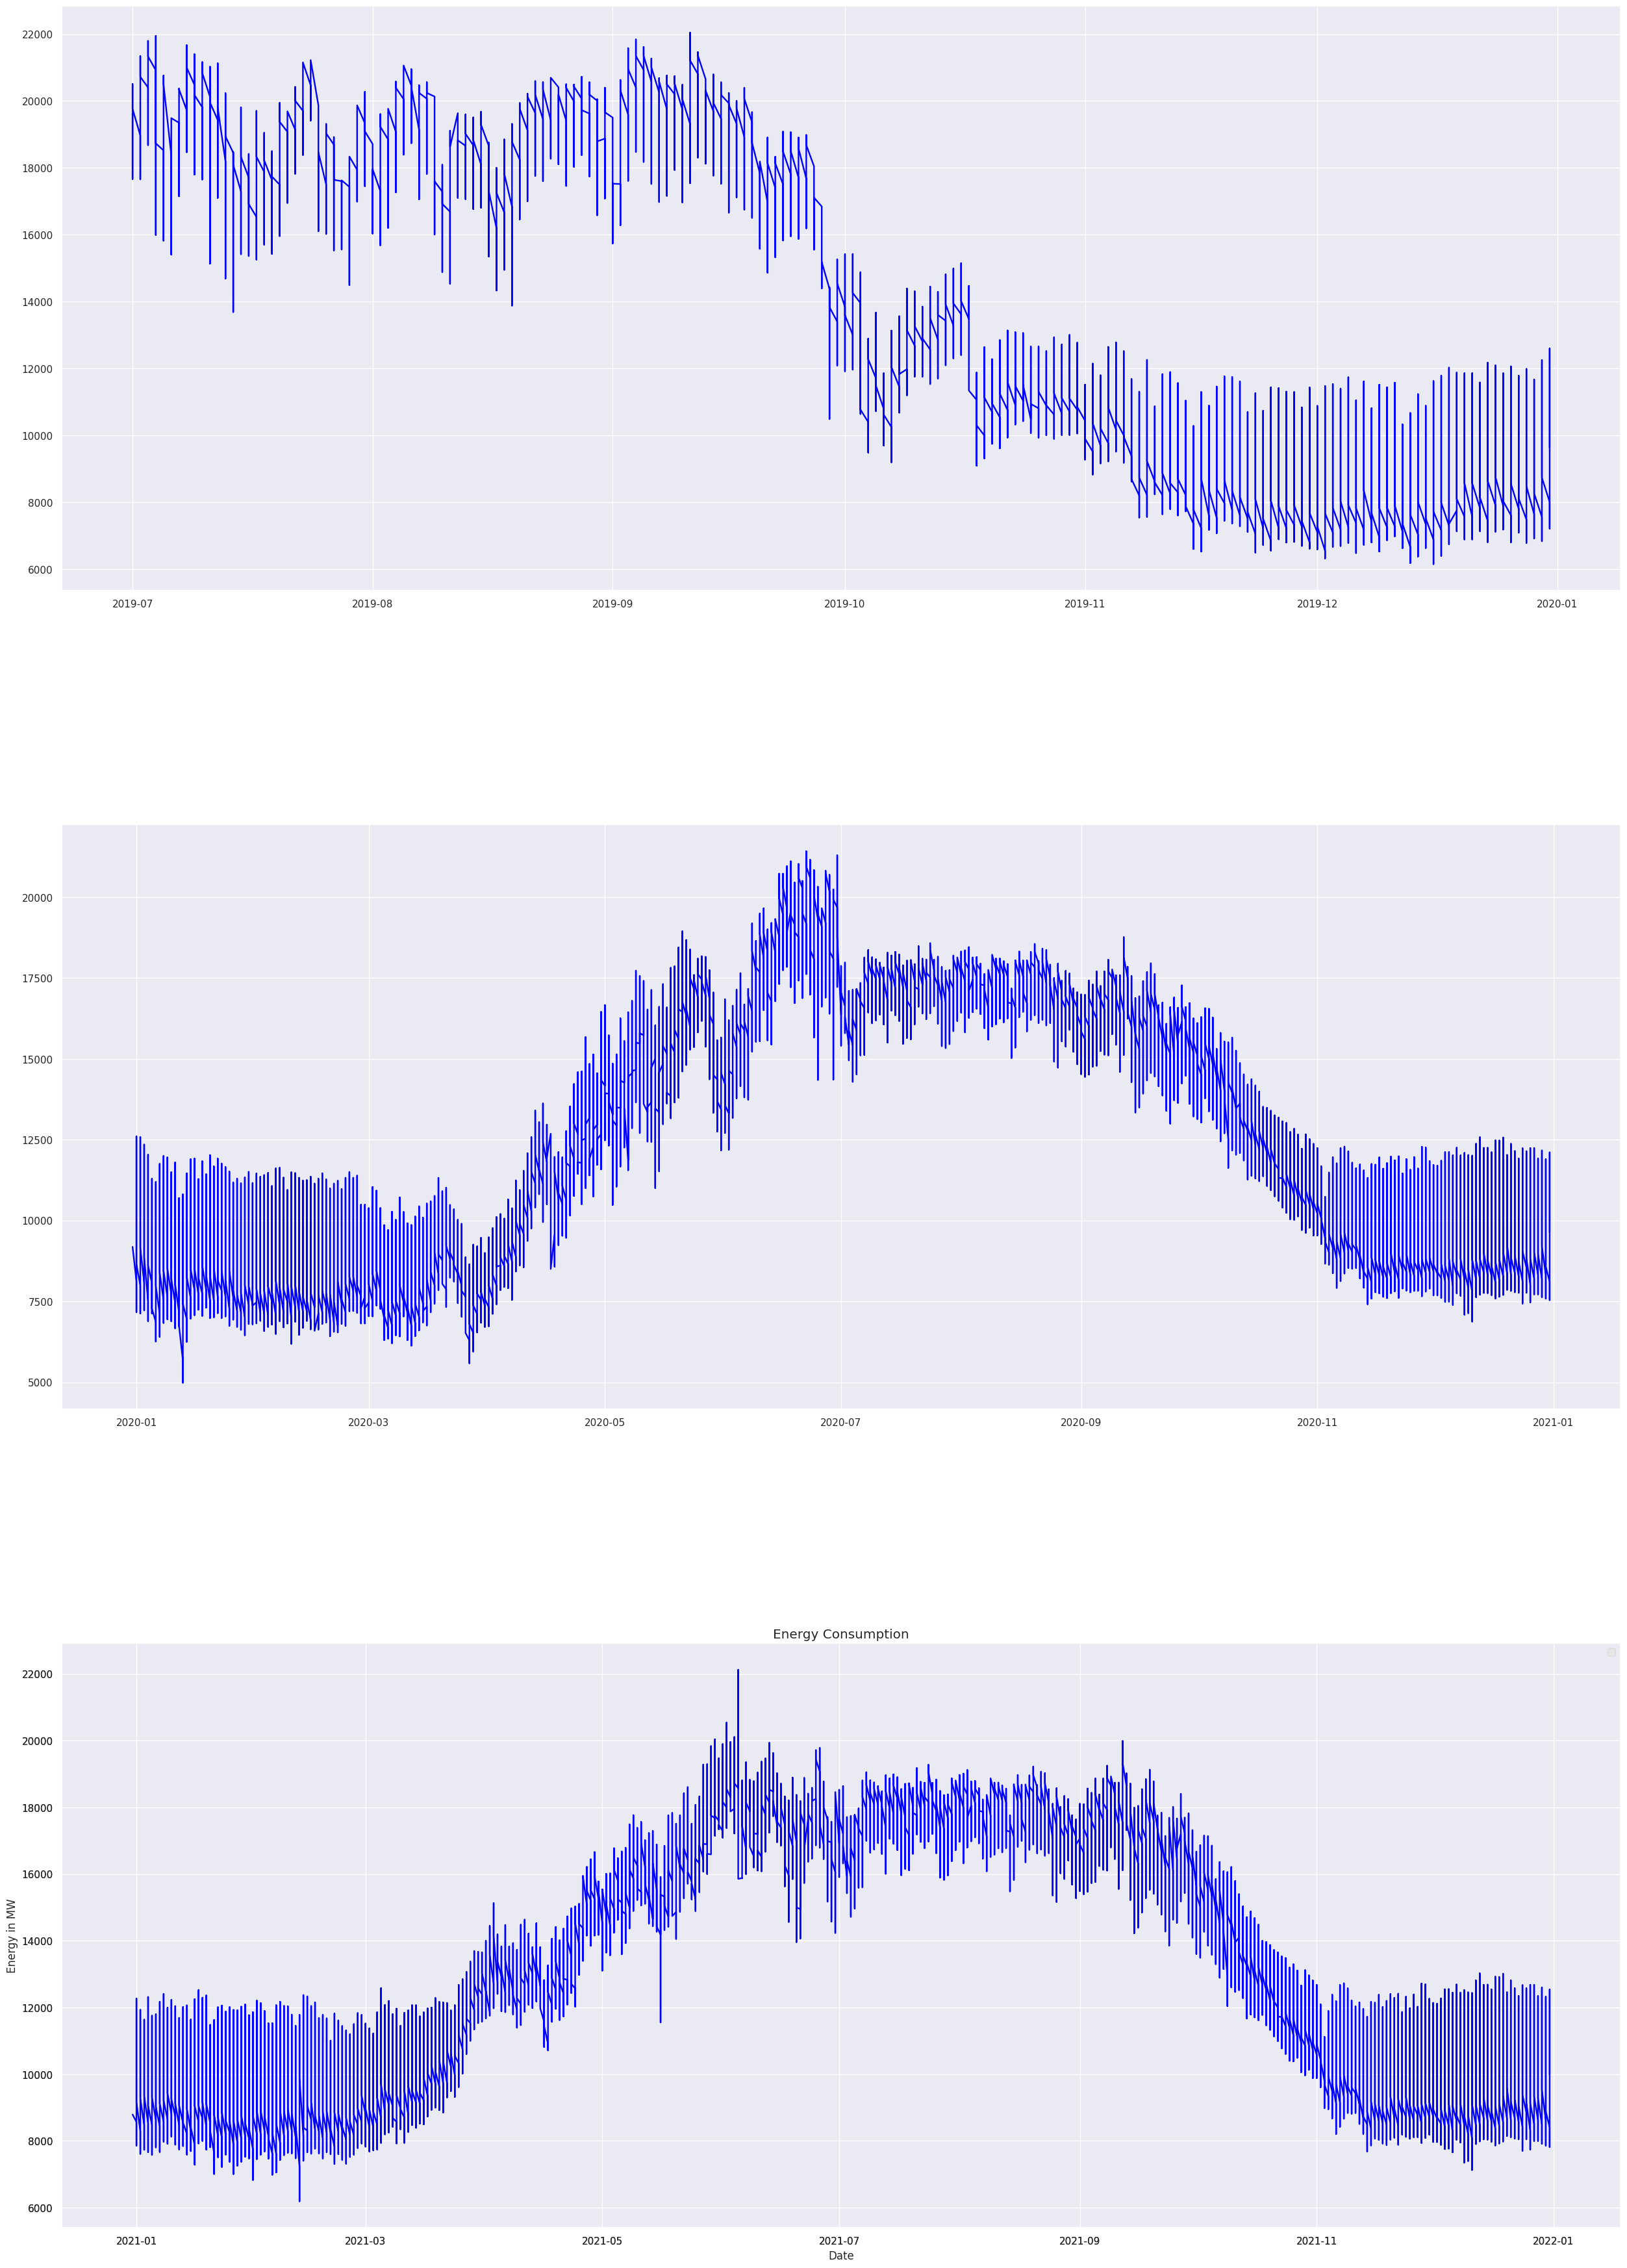

In [29]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))


ax1 = fig.add_subplot(614)
ax2 = fig.add_subplot(615)
ax3 = fig.add_subplot(616)
ax4 = fig.add_subplot(616)

style.use("ggplot")

y_2019 = dataset.loc["2019"]["Demand"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax1.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Demand"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax2.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Demand"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax3.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

y_2022 = dataset.loc["2022"]["Demand"].to_list()
x_2022 = dataset.loc["2022"]["Date"].to_list()
ax4.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-30-a31313ef0ea2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Demand"])


Text(0.5, 1.0, 'Energy Distribution')

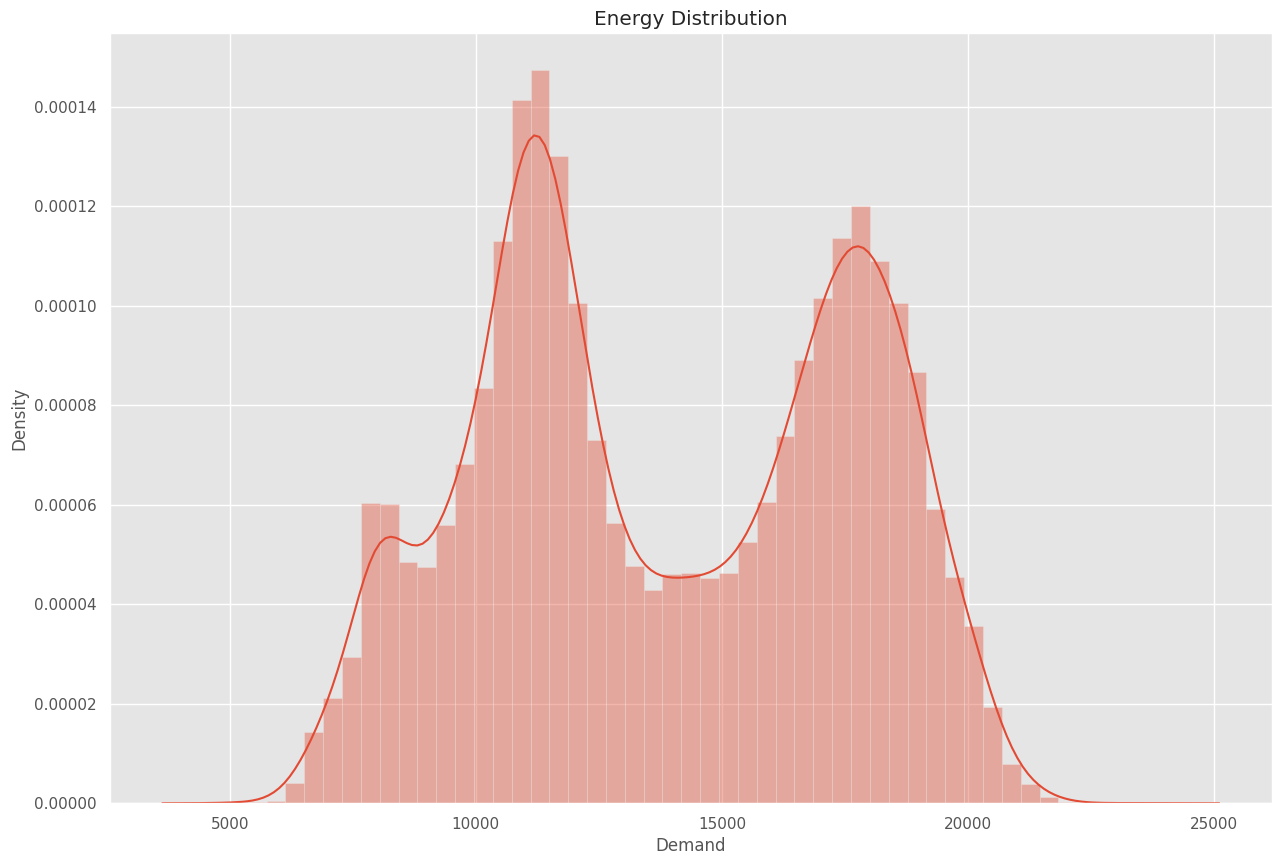

In [30]:
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Demand"])
plt.title("Energy Distribution")


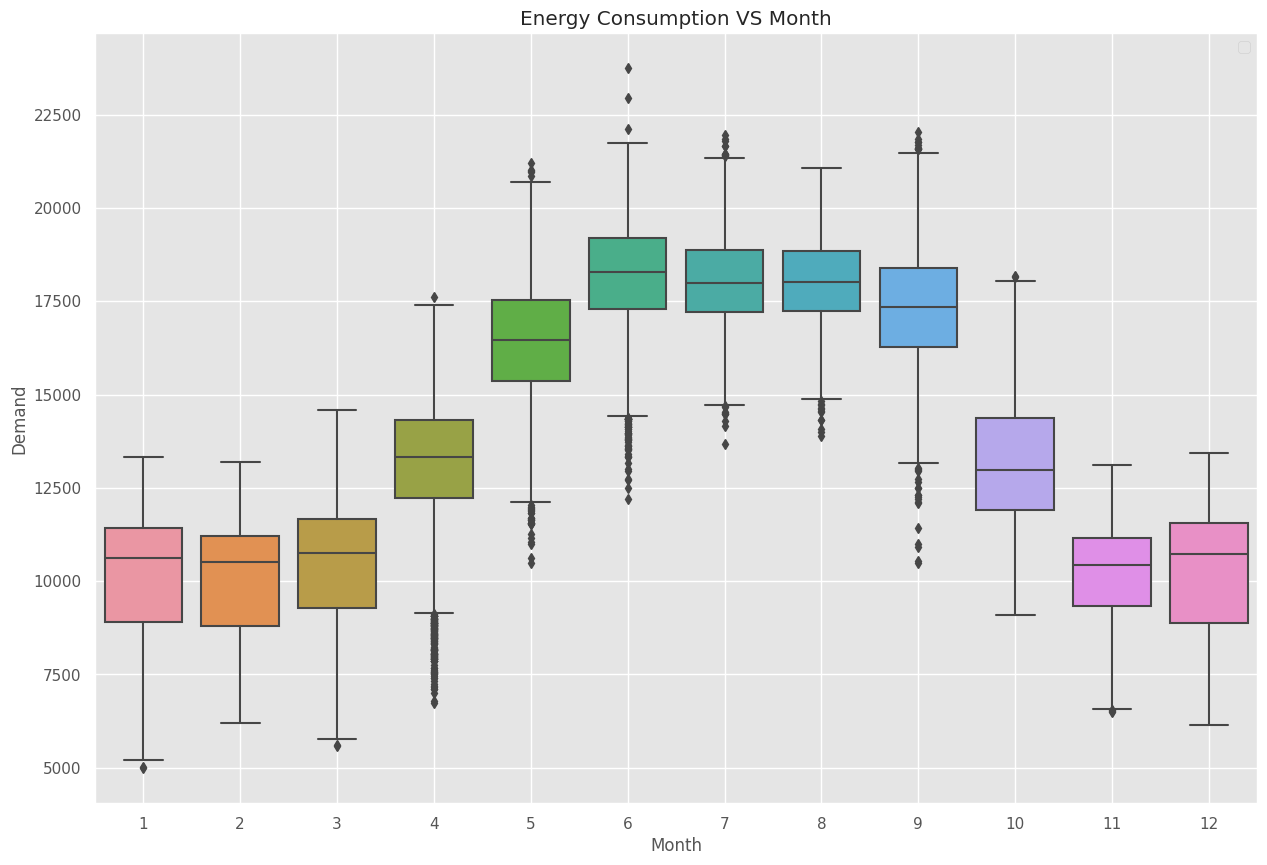

In [32]:

fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["month"], y=dataset["Demand"], data = dataset )
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

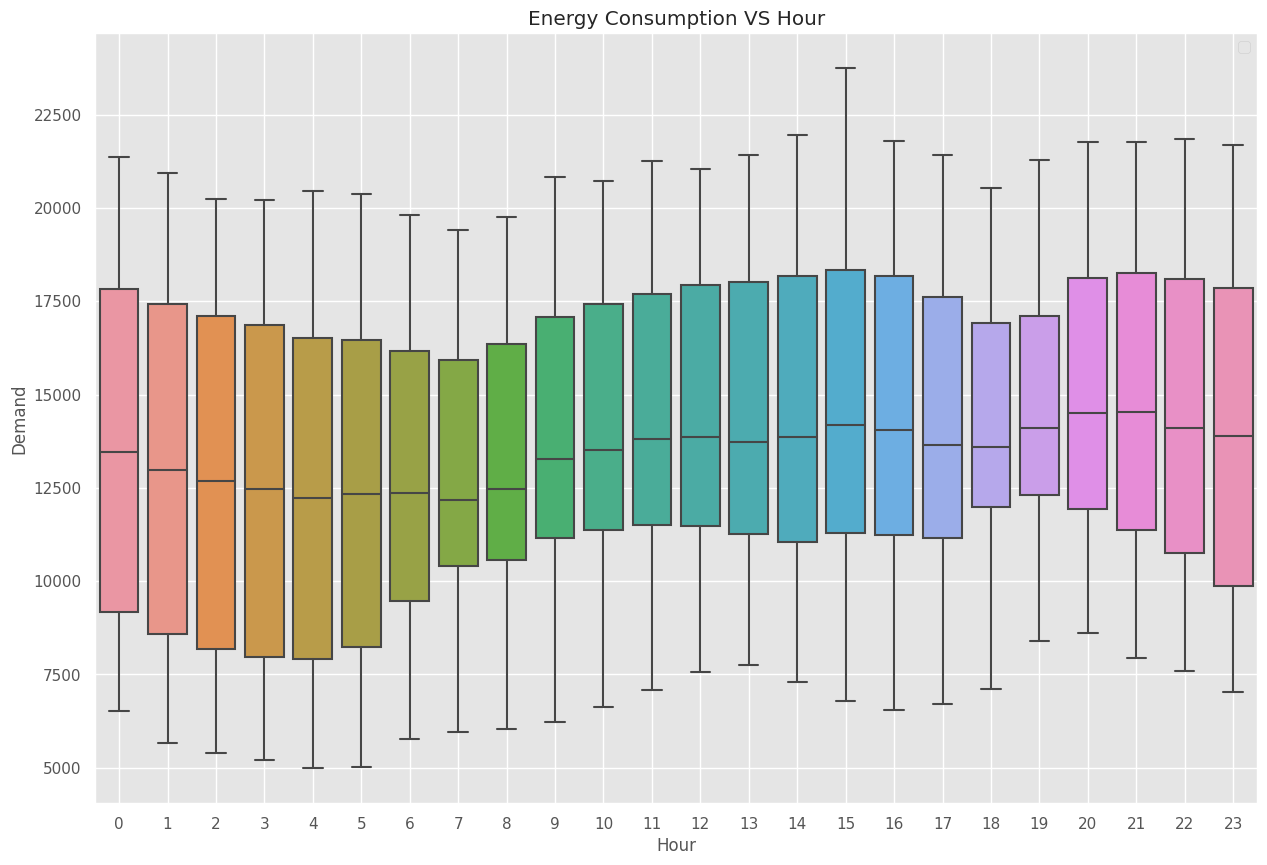

In [33]:


dataset1 = dataset
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.Demand, data= dataset)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

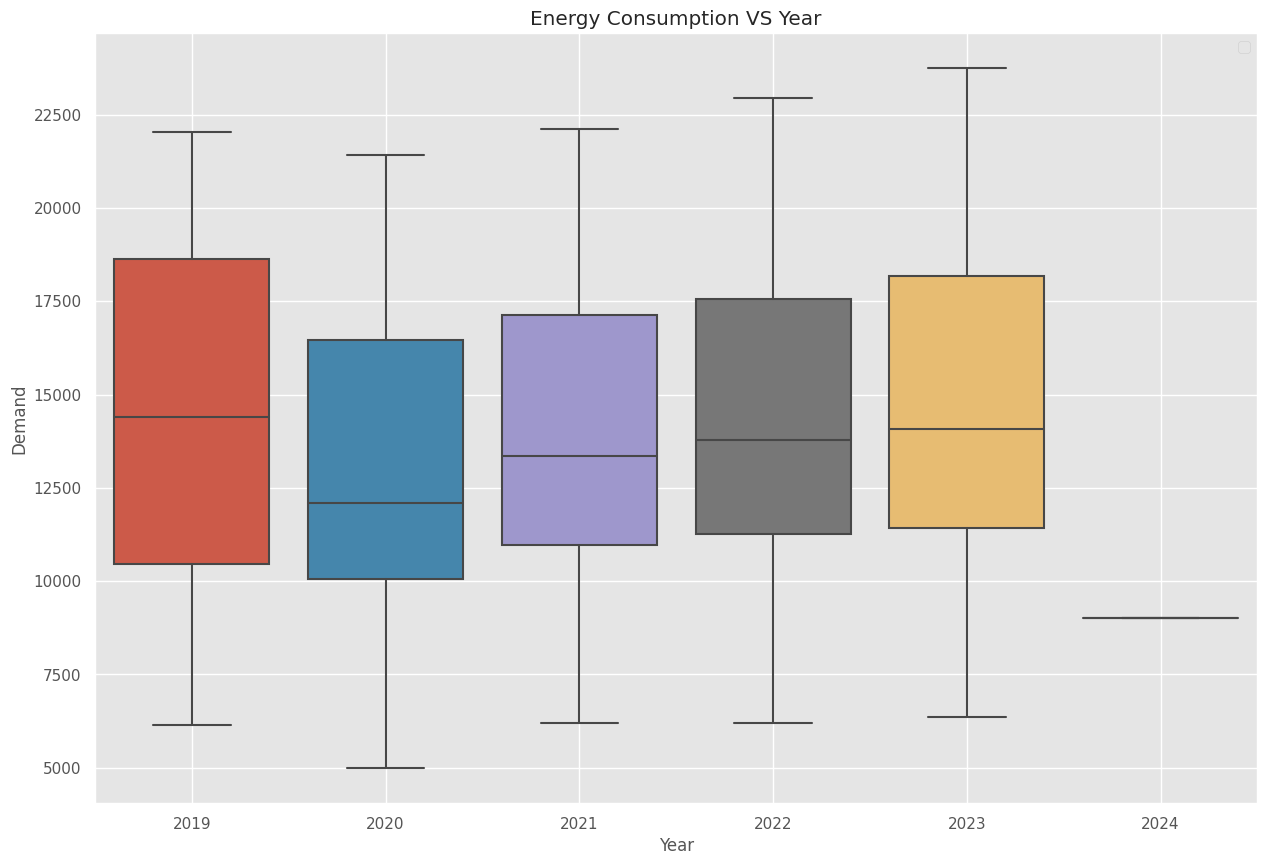

In [34]:

fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.year, y=dataset1.Demand, data= dataset)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)